- ab (tempo=70, pai=None)
  - bbn (tempo=214, pai=ab)
    - evdpw (tempo=387, pai=bbn)
      - gh (tempo=225, pai=evdpw)
        - llkgx (tempo=112, pai=gh)
          - lsq (tempo=263, pai=llkgx)
            - yuqfx (tempo=370, pai=lsq)
          - ubf (tempo=402, pai=llkgx)
            - wiv (tempo=201, pai=ubf)
        - stxd (tempo=282, pai=gh)
          - wh (tempo=360, pai=stxd)
          - su (tempo=393, pai=stxd)
        - rhkhp (tempo=104, pai=gh)
          - wx (tempo=222, pai=rhkhp)
          - rnhso (tempo=338, pai=rhkhp)
        - ilt (tempo=48, pai=gh)
          - uouhl (tempo=481, pai=ilt)
      - fb (tempo=149, pai=evdpw)
        - llmj (tempo=337, pai=fb)
        - kveba (tempo=91, pai=fb)
        - ld (tempo=234, pai=fb)
  - lu (tempo=428, pai=ab)
  - a (tempo=475, pai=ab)
    - cvhn (tempo=483, pai=a)
      - jl (tempo=442, pai=cvhn)


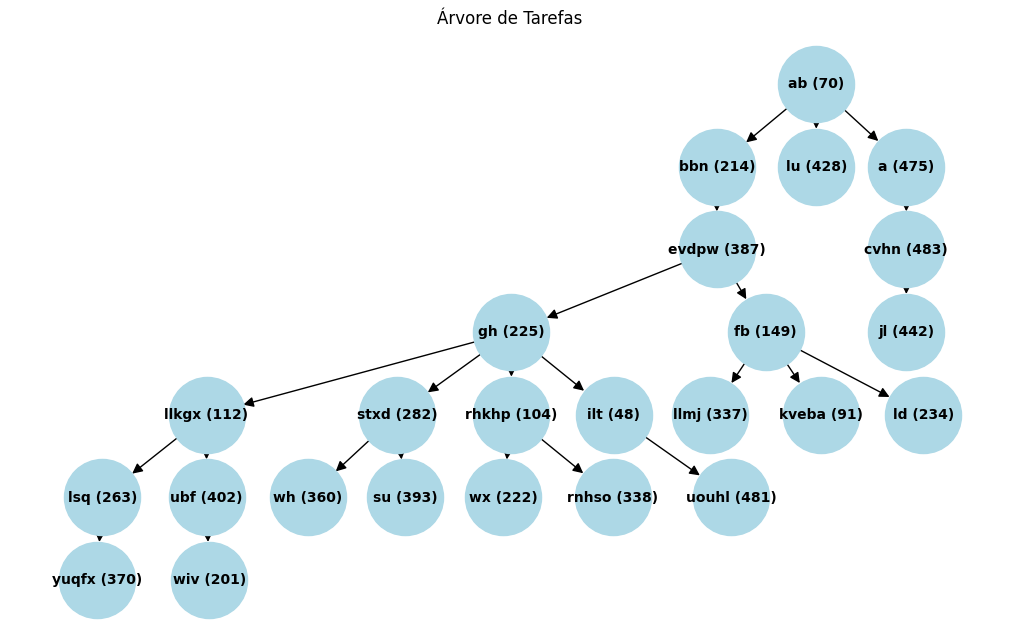

In [1]:
from TaskScheduler import TaskScheduler

scheduler = TaskScheduler("casos-t1-252/caso-enunciado.txt")

scheduler.mostrar_arvore()
tempo, ordem = scheduler.escalonar()
scheduler.desenhar_arvore()


In [2]:
import os
import pandas as pd

casos_t1_path = 'casos-t1-252/'
casos_t1_list = []
if os.path.exists(casos_t1_path):
    for path in os.listdir(casos_t1_path):
        scheduler = TaskScheduler(f'{casos_t1_path}{path}')
        info = scheduler.compara_politicas()
        casos_t1_list.append(info)
        

df = pd.DataFrame(casos_t1_list)
        
df

,file,proc,quantidade_tarefas,melhor_politica,politica_max,politica_min,soma_total_tempos,proporcao_proc_tarefas,media_tempo_por_tarefa
0,casos-t1-252/caso10.txt,5,10,IGUAIS,1568,1568,2492,2.00,249.20
1,casos-t1-252/caso200.txt,16,200,MAX,4375,4515,49191,12.50,245.96
2,casos-t1-252/caso500.txt,24,500,MAX,6879,7520,125312,20.83,250.62
3,casos-t1-252/caso2000.txt,46,2000,MAX,13887,15162,516543,43.48,258.27
4,casos-t1-252/caso-enunciado.txt,4,25,MIN,2337,2178,7111,6.25,284.44
5,casos-t1-252/caso100.txt,12,100,IGUAIS,3315,3315,24917,8.33,249.17
6,casos-t1-252/caso5000.txt,72,5000,MAX,20671,20906,1290470,69.44,258.09
7,casos-t1-252/caso20000.txt,143,20000,MIN,38835,38364,5093782,139.86,254.69
8,casos-t1-252/caso1000.txt,33,1000,MAX,8836,8989,250645,30.30,250.65
9,casos-t1-252/caso5.txt,4,5,IGUAIS,783,783,1092,1.25,218.40


Analisando o gráfico de barras comparativo, podemos observar alguns insights:
Variação entre políticas: Para a maioria dos casos, as políticas MAX e MIN apresentam tempos de execução muito próximos, indicando que a escolha da política pode não ter um impacto significativo no tempo total para esses cenários.


Casos com diferença: Em alguns casos, como caso200.txt, caso500.txt, caso2000.txt, caso20000.txt, caso1000.txt e caso10000.txt, há uma diferença mais perceptível entre as políticas. Nesses casos, a política MAX geralmente apresenta um tempo de execução ligeiramente menor ou maior, dependendo do caso. Por exemplo, em caso-enunciado.txt a política MIN é melhor, enquanto em caso200.txt a política MAX é melhor.


Escalabilidade: Observa-se que, à medida que a quantidade de tarefas aumenta (ex: de caso10.txt para caso20000.txt), o tempo de execução total também aumenta consideravelmente, como esperado. O gráfico permite visualizar essa tendência de forma clara.

Gráfico salvo como comparative_bar_chart.png


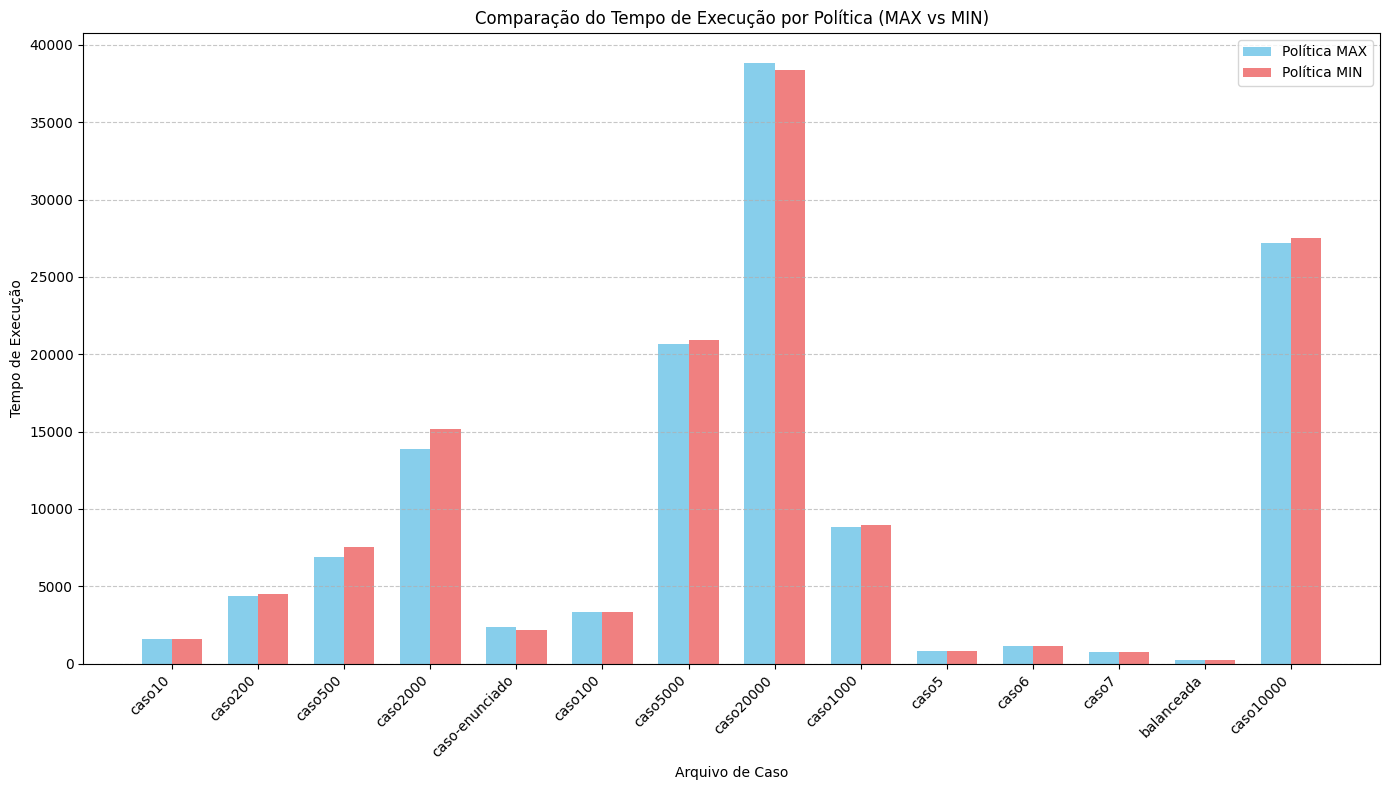

In [3]:

import matplotlib.pyplot as plt
df['short_file'] = df['file'].apply(lambda x: x.split('/')[-1].replace('.txt', ''))

bar_width = 0.35
index = range(len(df))

plt.figure(figsize=(14, 8))

plt.bar([i - bar_width/2 for i in index], df['politica_max'], bar_width, label='Política MAX', color='skyblue')
plt.bar([i + bar_width/2 for i in index], df['politica_min'], bar_width, label='Política MIN', color='lightcoral')

plt.xlabel('Arquivo de Caso')
plt.ylabel('Tempo de Execução')
plt.title('Comparação do Tempo de Execução por Política (MAX vs MIN)')
plt.xticks(index, df['short_file'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('comparative_bar_chart.png')
print('Gráfico salvo como comparative_bar_chart.png')

Gráfico salvo como policy_distribution_pie_chart.png


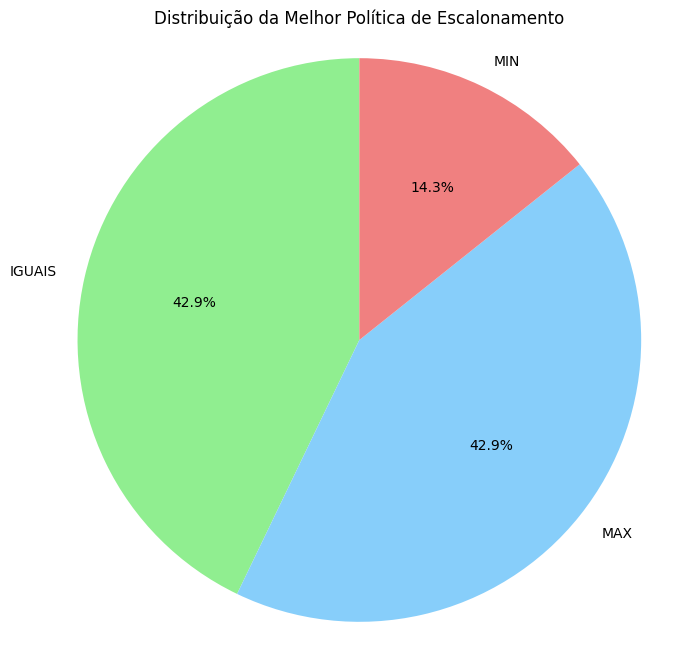

In [4]:
policy_counts = df['melhor_politica'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(policy_counts, labels=policy_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightskyblue', 'lightcoral'])
plt.title('Distribuição da Melhor Política de Escalonamento')
plt.axis('equal')
plt.savefig('policy_distribution_pie_chart.png')
print('Gráfico salvo como policy_distribution_pie_chart.png')